<a href="https://colab.research.google.com/github/sharanabasavaJNV/Convolutional-neural-network/blob/main/Copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nalinasm","key":"bf626278b04d8adb1b46189a015d719c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

 98% 420M/427M [00:06<00:00, 62.2MB/s]
100% 427M/427M [00:06<00:00, 69.1MB/s]


In [ ]:
from zipfile import ZipFile
file_name="waste-classification-data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from PIL import Image

In [ ]:
train_path = '/content/DATASET/TRAIN'
test_path = '/content/DATASET/TEST'
IMG_BREDTH = 30
IMG_HEIGHT = 60
num_classes = 2

In [ ]:
train_batch = ImageDataGenerator(featurewise_center=False,
                                 samplewise_center=False, 
                                 featurewise_std_normalization=False, 
                                 samplewise_std_normalization=False, 
                                 zca_whitening=False, 
                                 rotation_range=45, 
                                 width_shift_range=0.2, 
                                 height_shift_range=0.2, 
                                 horizontal_flip=True, 
                                 vertical_flip=False).flow_from_directory(train_path, 
                                                                          target_size=(IMG_HEIGHT, IMG_BREDTH), 
                                                                          classes=['O', 'R'], 
                                                                          batch_size=100)

test_batch = ImageDataGenerator().flow_from_directory(test_path, 
                                                      target_size=(IMG_HEIGHT, IMG_BREDTH), 
                                                      classes=['O', 'R'], 
                                                      batch_size=100)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
def cnn_model():
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_BREDTH,3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))
              
    model.summary()
              
    return model

def use_model(path):

    model = load_model('best_waste_classifier.h5')
    pic = plt.imread(path)
    pic = cv2.resize(pic, (IMG_BREDTH, IMG_HEIGHT))
    pic = np.expand_dims(pic, axis=0)
    classes = model.predict_classes(pic)
    model = load_model('best_waste_classifier.h5')
    pic1 = plt.imread(path)
    pic = Image.open(path).resize((IMG_BREDTH, IMG_HEIGHT))
    plt.imshow(pic1)
    if model.predict_classes(np.expand_dims(pic, axis=0)) == 0:
         classes = 'ORGANIC'
    elif model.predict_classes(np.expand_dims(pic, axis=0)) == 1:
         classes = 'RECYCLABLE'
    return classes

In [ ]:
model = cnn_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 58, 28, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 11, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 9, 64)         3

In [ ]:
checkpoint = ModelCheckpoint('best_waste_classifier.h5', 
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True, 
                             mode='auto')

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics=['accuracy'])

In [ ]:
model = model.fit_generator(train_batch,  
                            validation_data=test_batch,  
                            epochs=10, 
                            verbose=1, 
                            callbacks=[checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
226/226 [==============================] - 38s 169ms/step - loss: 1.3635 - accuracy: 0.6725 - val_loss: 0.4766 - val_accuracy: 0.7959
Epoch 2/10
226/226 [==============================] - 38s 166ms/step - loss: 0.5058 - accuracy: 0.7691 - val_loss: 0.4268 - val_accuracy: 0.8257
Epoch 3/10
226/226 [==============================] - 37s 164ms/step - loss: 0.4756 - accuracy: 0.7870 - val_loss: 0.4259 - val_accuracy: 0.8349
Epoch 4/10
226/226 [==============================] - 36s 161ms/step - loss: 0.4517 - accuracy: 0.7982 - val_loss: 0.4106 - val_accuracy: 0.8341
Epoch 5/10
226/226 [==============================] - 36s 161ms/step - loss: 0.4444 - accuracy: 0.8039 - val_loss: 0.3787 - val_accuracy: 0.8424
Epoch 6/10
226/226 [==============================] - 36s 160ms/step - loss: 0.4366 - accuracy: 0.8053 - val_loss: 0.3700 - val_accuracy: 0.8424
Epoch 7/10
226/226 [==============================] - 

ORGANIC


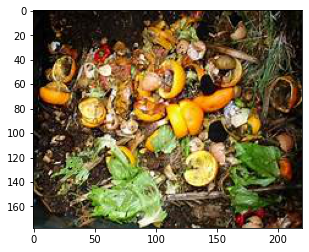

In [ ]:
print(use_model('/content/org4.jpg'))